In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class CutOut:

    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)

    def __call__(self, inputs):

        active = int(np.random.randint(0, self.ratio, 1))

        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h)
            box_size = int(min_len//4)
            idx = int(np.random.randint(0, min_len-box_size, 1))
            inputs[:,idx:idx+box_size,idx:idx+box_size] = 0

        return inputs

In [3]:
def imshow(img):
    plt.figure(figsize=(10,100))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

C:\Users\it\AppData\Local\Temp\ipykernel_17560\510329824.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  active = int(np.random.randint(0, self.ratio, 1))
C:\Users\it\AppData\Local\Temp\ipykernel_17560\510329824.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx = int(np.random.randint(0, min_len-box_size, 1))


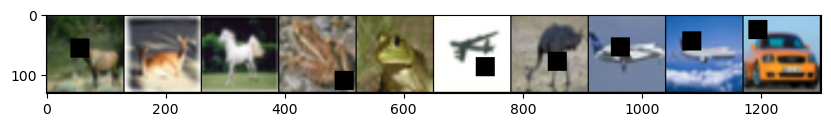

torch.Size([10, 3, 128, 128])


In [4]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
images, labels = next(iter(trainloader))
imshow(torchvision.utils.make_grid(images,nrow=10))
print(images.size()) # 배치 및 이미지 크기 확인

